In [4]:
from core.generate_points import get_points

svg_file_path = "data/fourier.svg"
pts_file_path = svg_file_path.replace(".svg", ".pts")

points = get_points(pts_file_path) # Complex number array

print(points)

[0.03266114-0.22278982j 0.03433856-0.22417314j 0.03610845-0.22531845j ...
 0.02683646-0.21730836j 0.02957938-0.21991355j 0.03266114-0.22278982j]


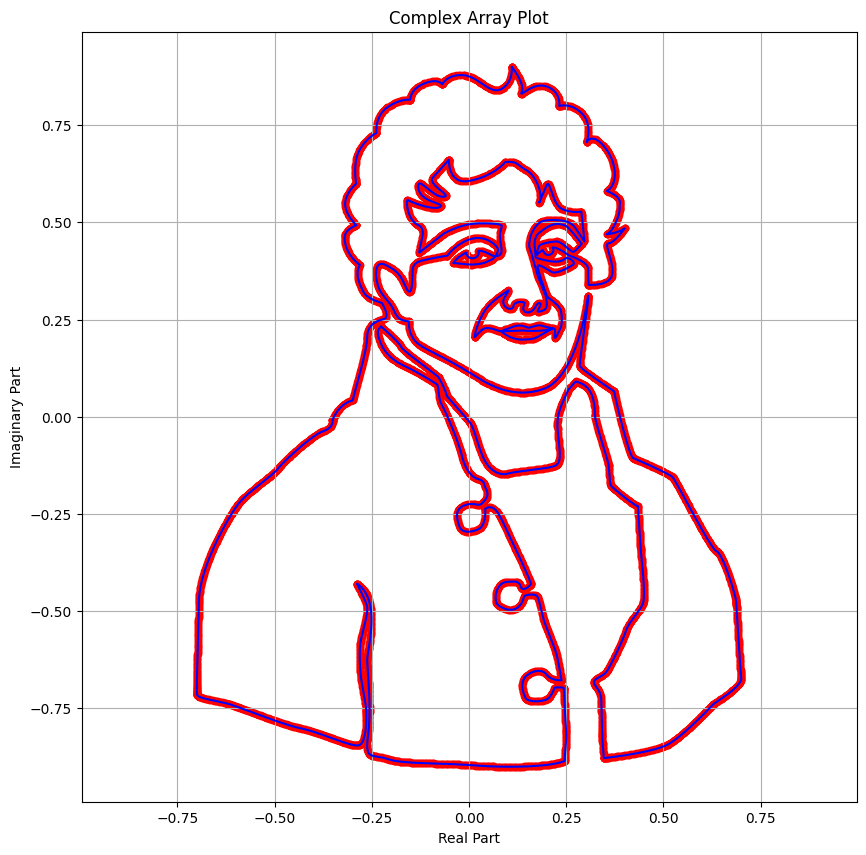

In [11]:
# plot complex array 
import matplotlib.pyplot as plt
import numpy as np

# Extract real and imaginary parts
real_parts = np.real(points)
imag_parts = -np.imag(points)

plt.figure(figsize=(10, 10))
plt.plot(real_parts, imag_parts, 'b-')
plt.scatter(real_parts, imag_parts, c='r', s=20)
plt.title('Complex Array Plot')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.axis('equal')
plt.show()


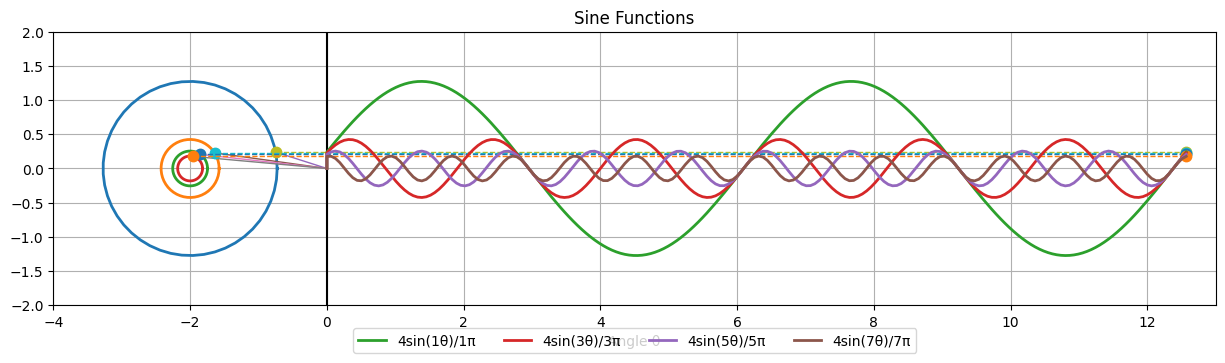

In [14]:
# Sine Wave Animation 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Animation params
periods = 2
num_steps = 100 * periods

# Circles
freq = np.array([1, 3, 5, 7])
r = 4 / (freq * np.pi)
K = len(freq)
R = np.max(r)
bounds = np.ceil(R)

# Circles points (co-centric)
t = np.linspace(0, 2*np.pi, 50)
x = r[:, np.newaxis] * np.cos(t) - bounds
y = r[:, np.newaxis] * np.sin(t)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 9))
plt.subplots_adjust(bottom=0.2)

# Plot circles
for i in range(K):
    ax.plot(x[i], y[i], linewidth=2)

# Plot y=0 axis
ax.axvline(x=0, color='k')

ax.grid(True)
ax.set_aspect('equal')
ax.set_xlim(-2*bounds, np.ceil(2*np.pi*periods))
ax.set_ylim(-bounds, bounds)
ax.set_xlabel('Angle θ')
ax.set_title('Sine Functions')

# Prepare animated graphics objects
radii = [ax.plot([], [], linewidth=1)[0] for _ in range(K)]
lines = [ax.plot([], [], linewidth=1, linestyle='--', marker='.', markersize=15)[0] for _ in range(K)]
curves = [ax.plot([], [], linewidth=2)[0] for _ in range(K)]

# Legend
legend_labels = [f'4sin({f}θ)/{f}π' for f in freq]
ax.legend(curves, legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=K)

# Animation function
xx = np.linspace(0, 2*np.pi*periods, num_steps)
theta = np.zeros(K)
step = (xx[1] - xx[0]) * freq

def animate(frame):
    for k in range(K):
        x = r[k] * np.cos(theta[k])
        y = r[k] * np.sin(theta[k])
        
        lines[k].set_data([x-bounds, xx[frame]], [y, y])
        radii[k].set_data([0, x-bounds], [0, y])
        
        curve_x, curve_y = curves[k].get_data()
        new_x = np.append(curve_x, xx[frame])
        new_y = np.append(curve_y, y)
        curves[k].set_data(new_x, new_y)
    
    theta[:] += step
    return radii + lines + curves

# Create animation
anim = FuncAnimation(fig, animate, frames=num_steps, interval=20, blit=True)

# plt.show()

# Uncomment the following lines to save the animation as a GIF
from matplotlib.animation import PillowWriter
anim.save('fourier_series.gif', writer=PillowWriter(fps=50))

/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_4810/585728465.py:51: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dots[i].set_data(x, y)


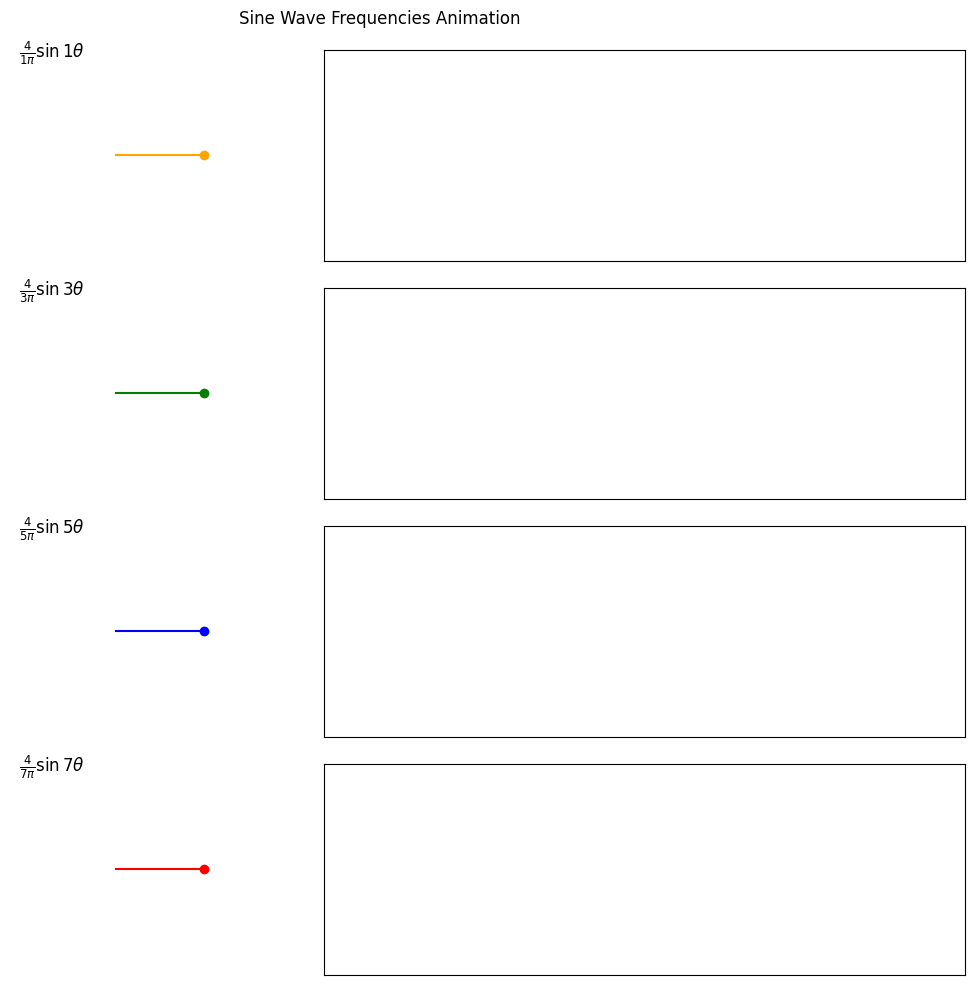

In [12]:
% animation params
periods = 2;                % how many full-period rotations to do
num_steps = 100 * periods;  % number of animation steps per period

% circles
freq = [1 3 5 7];           % frequency of each sine function (rotation speed)
r = 4./(freq*pi);           % radii of circles (amplitude of sines)
K = numel(freq);            % number of circles
R = max(r);                 % maximum radius
bounds = ceil(R);           % offset the circles to left of origin

% circles points (co-centric)
t = linspace(0, 2*pi, 50).';
x = bsxfun(@times, r, cos(t)) - bounds;  % shifted with offset
y = bsxfun(@times, r, sin(t));

% PLOT: open wide figure
pos = get(groot, 'DefaultFigurePosition');
hFig = figure('Position',pos .* [1 1 1.5 0.9]);
movegui(hFig, 'center')

% PLOT: circles
hCircles = line(x, y, 'LineWidth',2);       % plot circles
line([0 0], [-bounds bounds], 'Color','k')  % plot y=0 axis
grid on, box on
axis equal
axis([-2*bounds ceil(2*pi*periods) -bounds bounds])
xlabel('Angle \theta')
title('Sine Functions')
ax = gca;
ax.XTick = ax.XTick(ax.XTick >= 0);         % start x-ticks at zero

% PLOT: prepare animated graphics objects
hRadii = line(nan(2,K), nan(2,K), 'LineWidth',1);
hLines = line(nan(2,K), nan(2,K), 'LineWidth',1, ...
    'LineStyle','--', 'Marker','.', 'MarkerSize',15);

% PLOT: sine functions curves
xx = linspace(0, 2*pi*periods, num_steps);  % X-periods in N-steps
hCurves = gobjects(K,1);
for k=1:K
    hCurves(k) = animatedline('Color',hRadii(k).Color, 'LineWidth',2);
end
legend(hCurves, ...
    strcat('4sin(', num2str(freq(:)), '\theta)/', num2str(freq(:)), '\pi'), ...
    'Orientation','Horizontal', 'Location','SouthOutside')

% GIF
%{
% gifsicle --colors 256 --careful --delay=5 --optimize --crop 90,45+675x260 -o out1_.gif out1.gif
[im,map] = rgb2ind(frame2im(getframe(hFig)), 256);
imwrite(im, map, 'out1.gif', 'gif', 'DelayTime',0.1, 'LoopCount',Inf);
%}

% animation
theta = zeros(1,K);            % current rotation angles for each circle (in radians)
step = (xx(2)-xx(1)) .* freq;  % step sizes for each circle (arclen = angle / radius)
for i=1:num_steps
    % break if figure is closed
    if ~isgraphics(hFig), break; end
    
    % for each circle
    for k=1:K
        % rotating point on k-th circle
        x = r(k) * cos(theta(k));
        y = r(k) * sin(theta(k));

        % update graphics
        set(hLines(k), 'XData',[x-bounds; xx(i)], 'YData',[y; y])
        set(hRadii(k), 'XData',[0; x]-bounds, 'YData',[0; y])
        addpoints(hCurves(k), xx(i), y)
    end

    % refresh plot
    pause(0.02)    % drawnow
    
    % GIF
    %{
    [im,map] = rgb2ind(frame2im(getframe(hFig)), 256);
    imwrite(im, map, 'out1.gif', 'gif', 'DelayTime',0.1, 'WriteMode','append');
    %}

    % increment angles
    theta = theta + step;
end